In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

from sklearn.decomposition import PCA

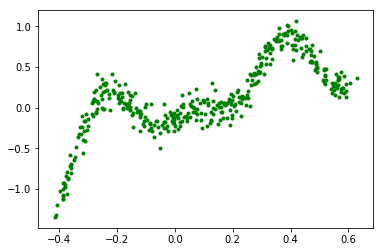

In [2]:
x = np.linspace(0,1,400)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y = (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = x - 0.4 #x.mean() # good practice to zero-center x in linear mapping
sortindx = np.argsort(x)
x = x[sortindx]
y = y[sortindx]
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
xy = np.c_[xx,yy]
plt.scatter(x, y, marker='.', color='g')

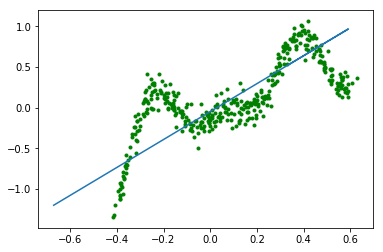

In [3]:
## Actual PCA/AE
#Instantiate a PCA model, the run fit_transform to xy followed by inverse_transform
pca=PCA(n_components=1)
xy_pca=pca.fit_transform(xy)
xy_n=pca.inverse_transform(xy_pca)

plt.scatter(x, y, marker='.', color='g')
plt.plot(xy_n[:, 0], xy_n[:,1])

## doing by using splines only !!

In [4]:
max_points = 2
lr=0.1
spline = tsp.SplineMatrixLayer(2,1, max_points)
splinei = tsp.SplineMatrixLayer(1,2, max_points)
max_points = 7

for spline_ in spline.spline_mat:
    for spline__ in spline_:
        spline__.n_max = max_points
for spline_ in splinei.spline_mat:
    for spline__ in spline_:
        spline__.n_max = max_points

In [5]:
# dir(spline)

_______________________
Steps 0
Error 0.14297684507830563


_______________________
Steps 10
Error 0.09413369741766697


_______________________
Steps 20
Error 0.0768980295483268


_______________________
Steps 30
Error 0.07044242099948278


_______________________
Steps 40
Error 0.06761062174808495


_______________________
Steps 50
Error 0.06594831301372865


_______________________
Steps 60
Error 0.06460623142700003


_______________________
Steps 70
Error 0.06327624478868683


_______________________
Steps 80
Error 0.061830898701679474


_______________________
Steps 90
Error 0.06020207940528022


_______________________
Steps 100
Error 0.05834034356417044


_______________________
Steps 110
Error 0.056201769690709016


_______________________
Steps 120
Error 0.05375425561442795


_______________________
Steps 130
Error 0.05100031452407841


_______________________
Steps 140
Error 0.04788070550814199


_______________________
Steps 150
Error 0.044379616293520045


_________________

_______________________
Steps 1310
Error 0.004922546274431648


_______________________
Steps 1320
Error 0.004919203000642399


_______________________
Steps 1330
Error 0.004916000498681102


_______________________
Steps 1340
Error 0.004912932916411036


_______________________
Steps 1350
Error 0.004909993050761316


_______________________
Steps 1360
Error 0.004907097481413928


_______________________
Steps 1370
Error 0.004904262479775509


_______________________
Steps 1380
Error 0.004901152976716077


_______________________
Steps 1390
Error 0.004898034247137642


_______________________
Steps 1400
Error 0.00489504009699251


_______________________
Steps 1410
Error 0.004892162733972056


_______________________
Steps 1420
Error 0.004889422991128783


_______________________
Steps 1430
Error 0.004886842549155438


_______________________
Steps 1440
Error 0.004884364665054601


_______________________
Steps 1450
Error 0.004881979155767738


TclError: invalid command name "pyimage14"

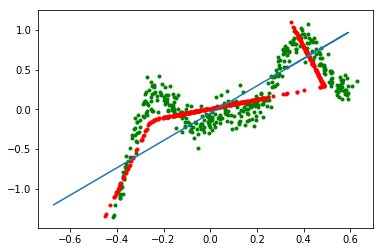

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):

    a1 = spline.forward(xy)
    xyi = splinei.forward(a1)
    
    dxy = tnn.MseLoss.del_loss(xyi, xy)
    error = tnn.MseLoss.loss(xyi, xy)

    
    da1 = splinei.backward(dxy)
    dxy = spline.backward(da1)
    
    spline.update(lr)
    splinei.update(lr)
    
    if step % 500 == 0:
        if step!=0:
            spline._maintain_good_spline_()
            splinei._maintain_good_spline_()
        
        
    if step % 10 == 0:            
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
#         epsilon=0.4
#         plt.xlim(x.min()-epsilon, x.max()+epsilon)
#         plt.ylim(y.min()-epsilon, y.max()+epsilon)
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(xyi[:,0],xyi[:,1], marker='.', color='r')
        plt.plot(xy_n[:, 0], xy_n[:,1])
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
# sp = spline.spline_mat[1][0]
# %matplotlib inline
# plt.scatter(sp.input, sp.output, marker='.', color='r')
# plt.scatter(sp.input, sp.output+sp.del_output, marker='.', color='c')

In [ ]:
# sp._increase_pieces_()
# sp._add_new_point_()
# sp.n_points

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(xyi[:,0],xyi[:,1], marker='.', color='r')
plt.plot(xy_n[:, 0], xy_n[:,1])

In [ ]:
plt.scatter(x, y, marker='.', color='g')
plt.scatter(x, a1)

## spline matrix and spline vector

In [ ]:
max_points = 4
lr=0.1
spline = tsp.SplineMatrixLayer(2,1, max_points)
func1d = tsp.SplineVectorLayer(1, max_points=2)
splinei = tsp.SplineMatrixLayer(1,2, max_points)

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):

    a1 = spline.forward(xy)
    a2 = func1d.forward(a1)
    xyi = splinei.forward(a2)
    
    dxy = tnn.MseLoss.del_loss(xyi, xy)
    error = tnn.MseLoss.loss(xyi, xy)

    
    da2 = splinei.backward(dxy)
    da1 = func1d.backward(da2)
    dxy = spline.backward(da1)
    
    spline.update(lr)
    func1d.update(lr)
    splinei.update(lr)
    
    if step % 100 == 0:
        spline._maintain_good_spline_()
        splinei._maintain_good_spline_()
        
        
    if step % 10 == 0:            
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
#         epsilon=0.4
#         plt.xlim(x.min()-epsilon, x.max()+epsilon)
#         plt.ylim(y.min()-epsilon, y.max()+epsilon)
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(xyi[:,0],xyi[:,1], marker='.', color='r')
        plt.plot(xy_n[:, 0], xy_n[:,1])
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(xyi[:,0],xyi[:,1], marker='.', color='r')
plt.plot(xy_n[:, 0], xy_n[:,1])